In [2]:
import pm4py

In [3]:
log = pm4py.read_xes('BPI_Challenge_2019.xes')
# the log is filtered on the top 5 variants
filtered_log = pm4py.filter_variants_top_k(log , 5)

parsing log, completed traces ::   0%|          | 0/251734 [00:00<?, ?it/s]

In [4]:
# a directly - follows graph (DFG) is discovered from the log
dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_log)


/Users/cadu/Documents/desenvolvimento/workspace/ml/my_env/lib/python3.12/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


In [5]:
# a process tree is discovered using the inductive miner
process_tree = pm4py.discover_process_tree_inductive(filtered_log)

In [6]:
# the process tree is converted to an accepting Petri net
petri_net , initial_marking, final_marking = pm4py.convert_to_petri_net(process_tree)
process_tree = pm4py.discover_process_tree_inductive(filtered_log)

In [7]:
# the accepting Petri net is converted to a BPMN diagram
bpmn_diagram = pm4py.convert_to_bpmn(petri_net, initial_marking, final_marking)

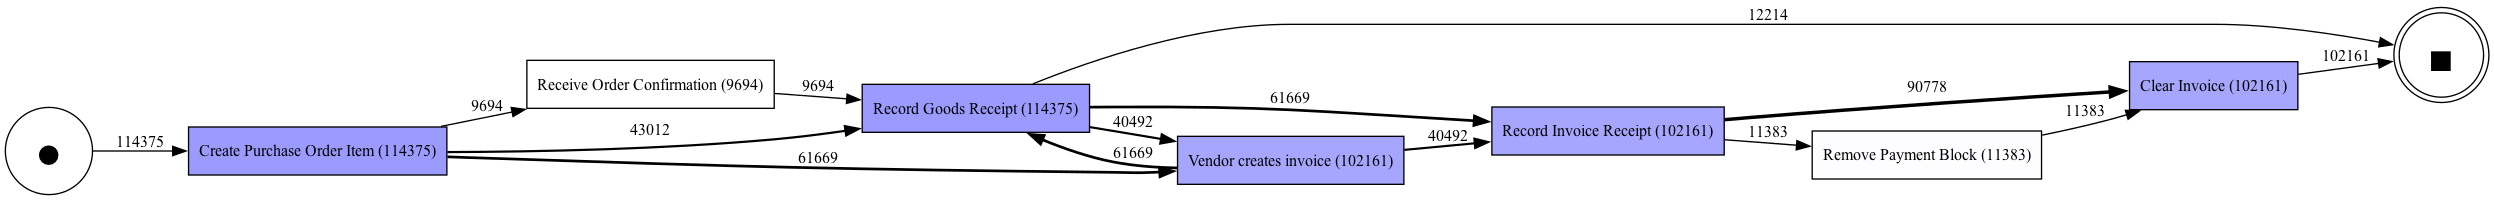

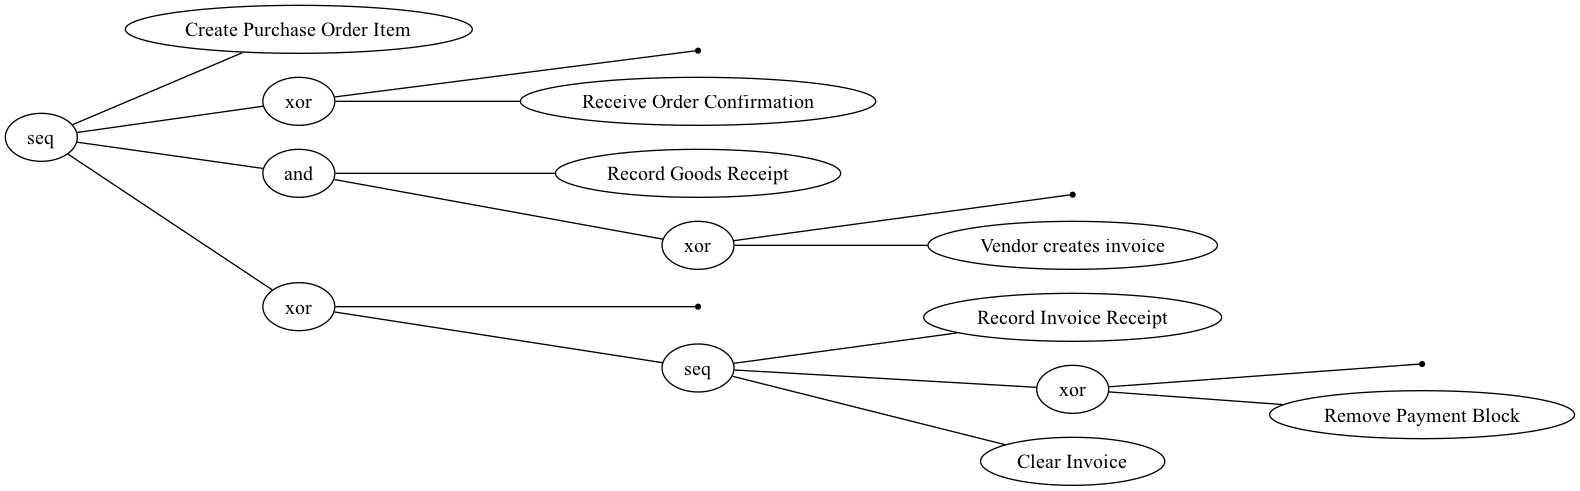

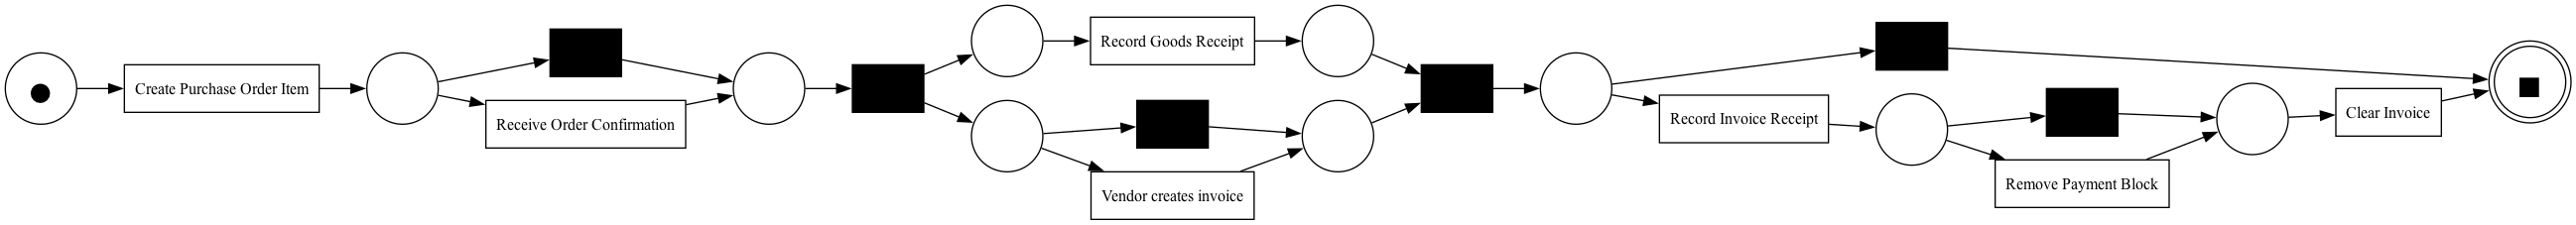

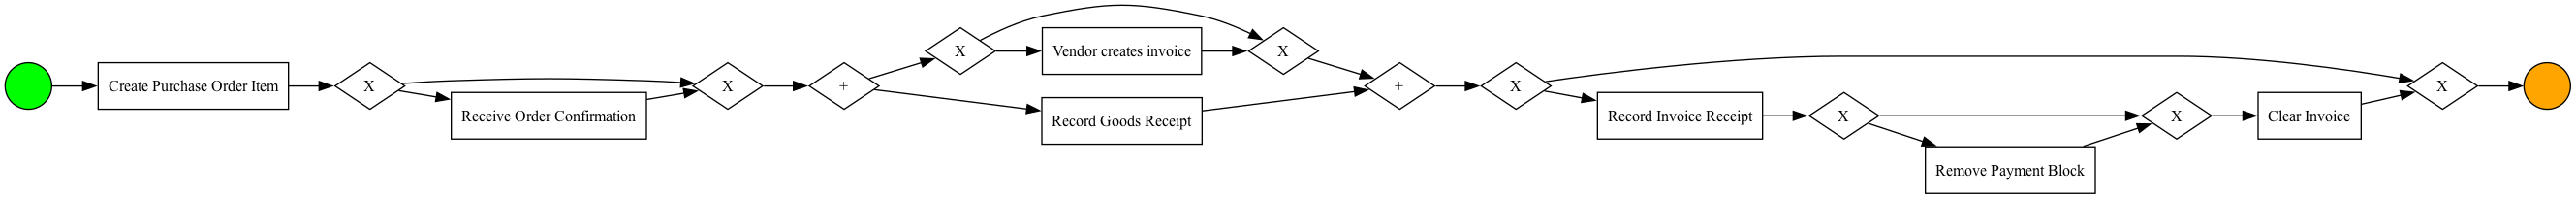

In [10]:
# the discovered process models are shown on the screen as .svg images
pm4py.view_dfg(dfg, start_activities, end_activities, format='png')
pm4py.view_process_tree(process_tree , format='png')
pm4py.view_petri_net(petri_net, initial_marking, final_marking, format='png')
pm4py.view_bpmn(bpmn_diagram, format='png')

In [11]:
# we compare the original log versus the discovered model
fitness = pm4py.fitness_token_based_replay(log, petri_net, initial_marking, final_marking)
precision = pm4py.precision_token_based_replay(log, petri_net, initial_marking, final_marking)
print(fitness) # 0.984
print(precision) # 0.758
# we check if the discovered model is a sound workflow net
is_sound_wfnet = pm4py.check_soundness(petri_net, initial_marking, final_marking)[0]
print(is_sound_wfnet) # True

replaying log with TBR, completed traces ::   0%|          | 0/11973 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/203425 [00:00<?, ?it/s]

{'perc_fit_traces': 68.58271032121208, 'average_trace_fitness': 0.9457987242625061, 'log_fitness': 0.9343835294702088, 'percentage_of_fitting_traces': 68.58271032121208}
0.9701234541829133
True


/Users/cadu/Documents/desenvolvimento/workspace/ml/my_env/lib/python3.12/site-packages/pm4py/algo/analysis/woflan/place_invariants/utility.py:153: UserWarning: solution from scipy may be unstable. Please install PuLP (pip install pulp) for fully reliable results.
  warnings.warn("solution from scipy may be unstable. Please install PuLP (pip install pulp) for fully reliable results.")
